# Data Analysis Two Cosmic Watches
The primary cosmic watch was place upside down to reduce the solid angle.

## Import Libraries and Data


Timestamp: 2024-07-16 10:58:59
Primary:
Event                                143487
RunTime                            74487660
ADC                                     480
SiPM                                 130.21
DownTime                           14578107
Temp                                   25.3
Time_stamp_ms               1721216426660.0
Time_stamp       2024-07-17 11:40:26.660000
Time_stamp2             2024-07-17 11:40:26
Time_stamp3             2024-07-17 11:40:00
Name: 143486, dtype: object
 
Secondary:
Event                                 11929
RunTime                            73786920
ADC                                     515
SiPM                                 147.53
DownTime                           13981917
Temp                                  26.38
Time_stamp_ms               1721215725920.0
Time_stamp       2024-07-17 11:28:45.920000
Time_stamp2             2024-07-17 11:28:45
Time_stamp3             2024-07-17 11:28:00
Name: 11928, dtype: object


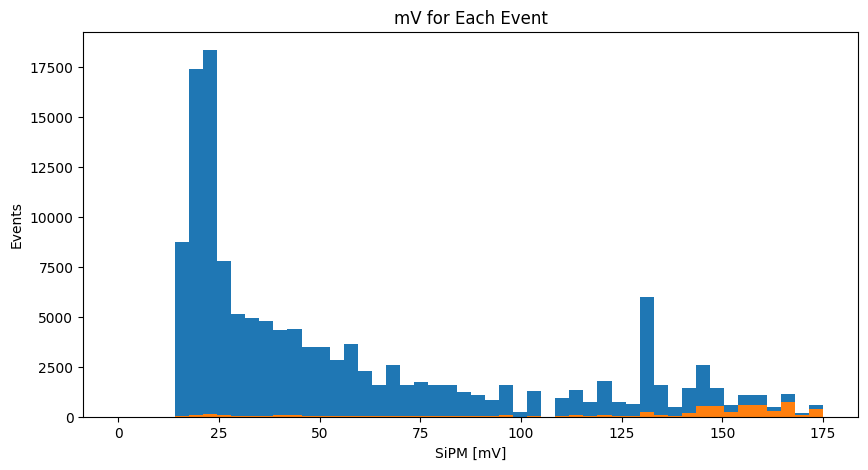

In [1]:
# imports some software packages we'll use

import pandas as pd #Pandas lets us name the columns of our data more likea spread sheet.
import numpy as np #Numpy is used by pandas for calculatiions
import matplotlib as mpl #For ploting data
import matplotlib.pyplot as plt #For typing less when poloting data
import math #for other math we might do.
import seaborn as sns
from datetime import datetime, timedelta
import os
import re

# Import the function from data_read_in.py
%run data_read_in.py

# Now you can use the read_and_filter_txt function
dataA, dataB, ts = read_and_filter_txt()

print(f"Timestamp: {ts}")

inline_rc = dict(mpl.rcParams) #Sets Parameters for plots.

# Set A
lastRowA = dataA.iloc[-1]
print("Primary:")
print(lastRowA)
print(" ")

# Set B
lastRowB = dataB.iloc[-1]
print("Secondary:")
print(lastRowB)

dataA['Time_stamp_m'] = dataA['Time_stamp']
# new_datetime = original_datetime.replace(second=0, microsecond=0)

# This makes a histogram of that totally useless calculation above
plt.figure(figsize=(10,5))
plt.hist(dataA.SiPM, bins=50, range=[0,175], log=False)
plt.hist(dataB.SiPM, bins=50, range=[0,175], log=False)
plt.title("mV for Each Event")
plt.xlabel("SiPM [mV]")
plt.ylabel("Events");


## Calculate and Plot Rate Every Min

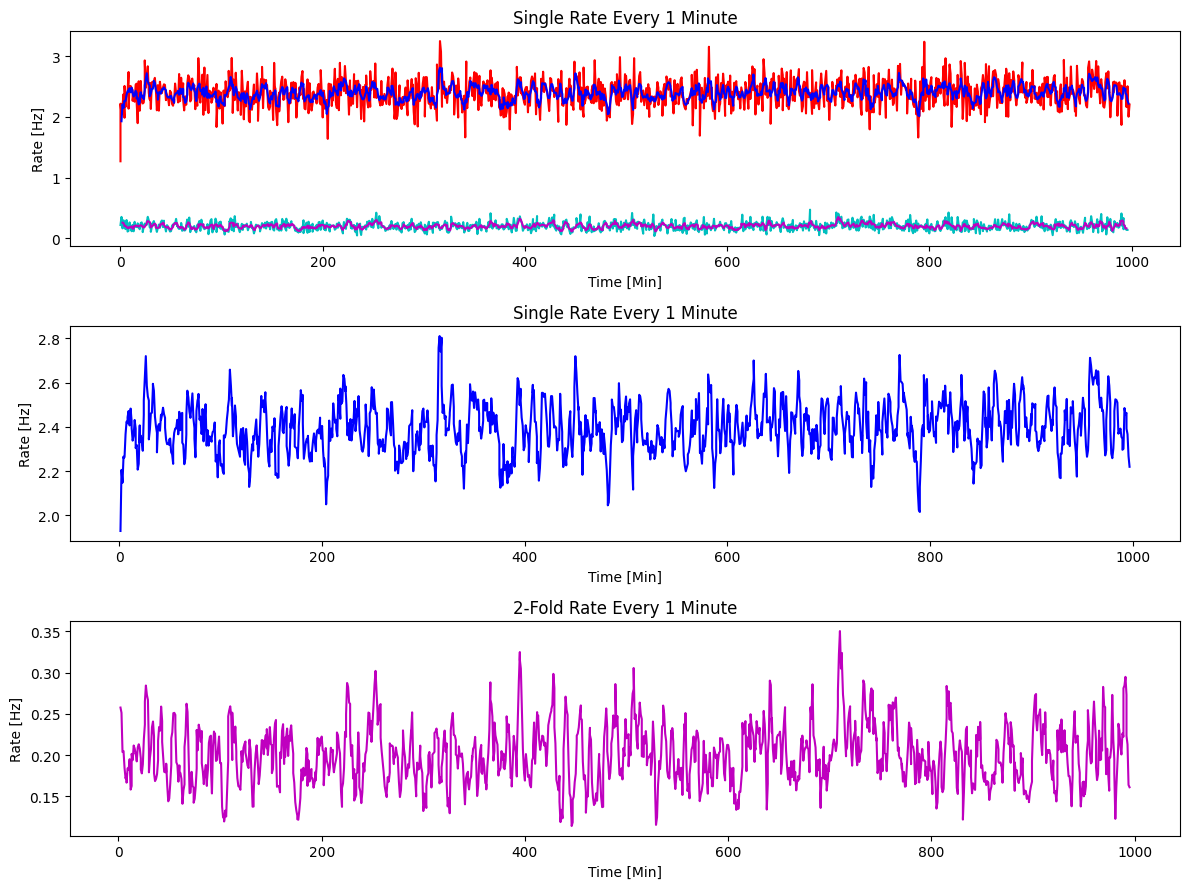

In [9]:
#### Set A
dataA['UpTime'] = (dataA.RunTime - dataA.DownTime)
dataA['Time'] = pd.to_timedelta(dataA.UpTime, unit='ms')
dataA['Minute']= (dataA.UpTime/(60000))
dataA.Minute = (dataA.Minute).astype(int)
dataA['Hour']= (dataA.Minute/(60))
dataA['Days']= (dataA.Hour/(24))
dataA['avgRate'] = dataA.Event/(dataA.UpTime/1000)

Data1MinA = dataA.drop_duplicates(subset=['Time_stamp3'], keep='first')
Data1MinA = Data1MinA.loc[:,('Event','RunTime','DownTime','UpTime','Time','Time_stamp','Time_stamp2','Time_stamp3','Minute','Hour','Days','avgRate')]

Data1MinA['DeltaCount'] = Data1MinA.Event - Data1MinA.Event.shift(1)
Data1MinA['DeltaUpTime'] = Data1MinA.UpTime - Data1MinA.UpTime.shift(1)
Data1MinA['Rate'] = Data1MinA.DeltaCount / (Data1MinA.DeltaUpTime /1000)

#### Set B
dataB['UpTime'] = (dataB.RunTime - dataB.DownTime)
dataB['Time'] = pd.to_timedelta(dataB.UpTime, unit='ms')
dataB['Minute']= (dataB.UpTime/(60000))
dataB.Minute = (dataB.Minute).astype(int)
dataB['Hour']= (dataB.Minute/(600))
dataB['Days']= (dataB.Hour/(24))
dataB ['avgRate'] = dataB.Event/(dataB.UpTime/1000)


Data1MinB = dataB.drop_duplicates(subset=['Time_stamp3'], keep='first')
Data1MinB = Data1MinB.loc[:,('Event','RunTime','DownTime','UpTime','Time','Time_stamp','Time_stamp2','Time_stamp3','Minute','Hour','Days','avgRate')]

Data1MinB['DeltaCount'] = Data1MinB.Event - Data1MinB.Event.shift(1)
Data1MinB['DeltaUpTime'] = Data1MinB.UpTime - Data1MinB.UpTime.shift(1)
Data1MinB['Rate'] = Data1MinB.DeltaCount / (Data1MinB.DeltaUpTime /1000)

sigma = 1
Data1MinA['RateSmooth'] = Data1MinA['Rate'].rolling(window = 4, center = True).mean()
Data1MinB['RateSmooth'] = Data1MinB['Rate'].rolling(window = 4, center = True).mean()
"""
# Plot
plt.figure(figsize=(24,6))
plt.plot(dataA.Time_stamp3,dataA.Rate)
plt.plot(dataB.Time_stamp3,dataB.Rate)
plt.title("Rate Every 1 Minute")
plt.xlabel("")
plt.ylabel("");

"""

# Create a figure
fig = plt.figure(figsize=(12,9))

# Add the first subplot
ax1 = fig.add_subplot(311)  # 2 rows, 1 column, 1st subplot
ax1.plot(Data1MinA.Minute,Data1MinA.Rate, 'r-')  # 'r-' is a red line
ax1.plot(Data1MinA.Minute,Data1MinA.RateSmooth, 'b-')  # 'b-' is a blue line
ax1.plot(Data1MinB.Minute,Data1MinB.Rate, 'c-')  # 'c-' is a cyan line
ax1.plot(Data1MinB.Minute,Data1MinB.RateSmooth, 'm-')  # 'm-' is a magenta line
ax1.set_title('Single Rate Every 1 Minute')
ax1.set_xlabel('Time [Min]')
ax1.set_ylabel('Rate [Hz]')

# Add the first subplot
ax2 = fig.add_subplot(312)  # 2 rows, 1 column, 1st subplot
# ax2.plot(dataA.Minute,dataA.Rate, 'r-')  # 'r-' is a red line
ax2.plot(Data1MinA.Minute,Data1MinA.RateSmooth, 'b-')  # 'b-' is a blue line
ax2.set_title('Single Rate Every 1 Minute')
ax2.set_xlabel('Time [Min]')
ax2.set_ylabel('Rate [Hz]')

# Add the second subplot
# ax3 = fig.add_subplot(413)  # 2 rows, 1 column, 2nd subplot
# ax3.plot(Data1MinB.Minute,Data1MinB.Rate, 'r-')  # 'r-' is a red line
# ax3.plot(Data1MinB.Minute,Data1MinB.RateSmooth, 'b-')  # 'b-' is a blue line
# ax3.set_title('2-Fold Rate Every 1 Minute')
# ax3.set_xlabel('Time [Min]')
# ax3.set_ylabel('Rate [Hz]')

# Add the second subplot
ax4 = fig.add_subplot(313)  # 2 rows, 1 column, 2nd subplot
# ax4.plot(Data1MinB.Minute,Data1MinB.Rate, 'r-')  # 'r-' is a red line
ax4.plot(Data1MinB.Minute,Data1MinB.RateSmooth, 'm-')  # 'b-' is a blue line
ax4.set_title('2-Fold Rate Every 1 Minute')
ax4.set_xlabel('Time [Min]')
ax4.set_ylabel('Rate [Hz]')

# Display the plots
plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()

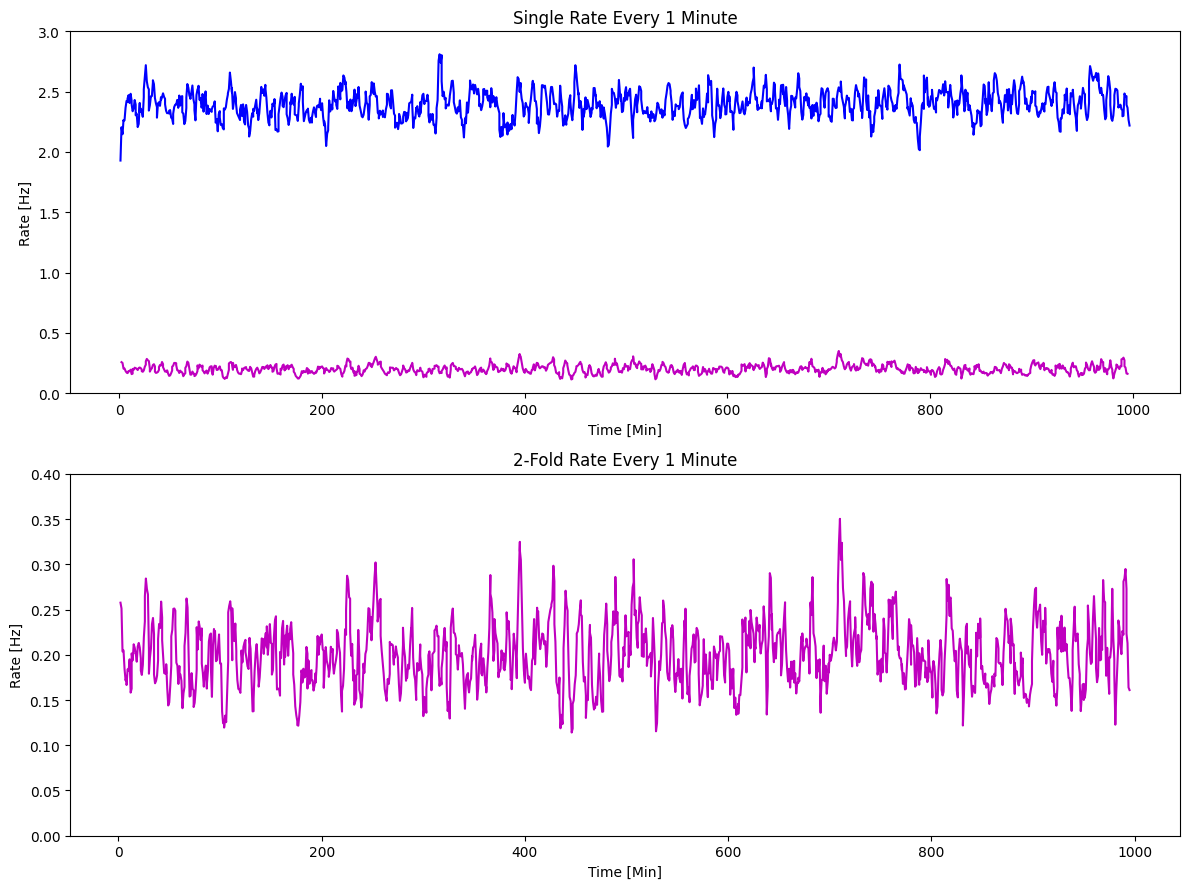

In [11]:
fig = plt.figure(figsize=(12,9))

# Add the first subplot
ax1 = fig.add_subplot(211)  # 2 rows, 1 column, 1st subplot
ax1.plot(Data1MinB.Minute,Data1MinB.RateSmooth, 'm-')  # 'b-' is a blue line
ax1.plot(Data1MinA.Minute,Data1MinA.RateSmooth, 'b-')  # 'b-' is a blue line
ax1.set_ylim(0.0,3)
ax1.set_title('Single Rate Every 1 Minute')
ax1.set_xlabel('Time [Min]')
ax1.set_ylabel('Rate [Hz]')

# Add the second subplot
ax2 = fig.add_subplot(212)  # 2 rows, 1 column, 2nd subplot
ax2.plot(Data1MinB.Minute,Data1MinB.RateSmooth, 'm-')  # 'b-' is a blue line
ax2.set_ylim(0.0, 0.4)
ax2.set_title('2-Fold Rate Every 1 Minute')
ax2.set_xlabel('Time [Min]')
ax2.set_ylabel('Rate [Hz]')

# Display the plots
plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()

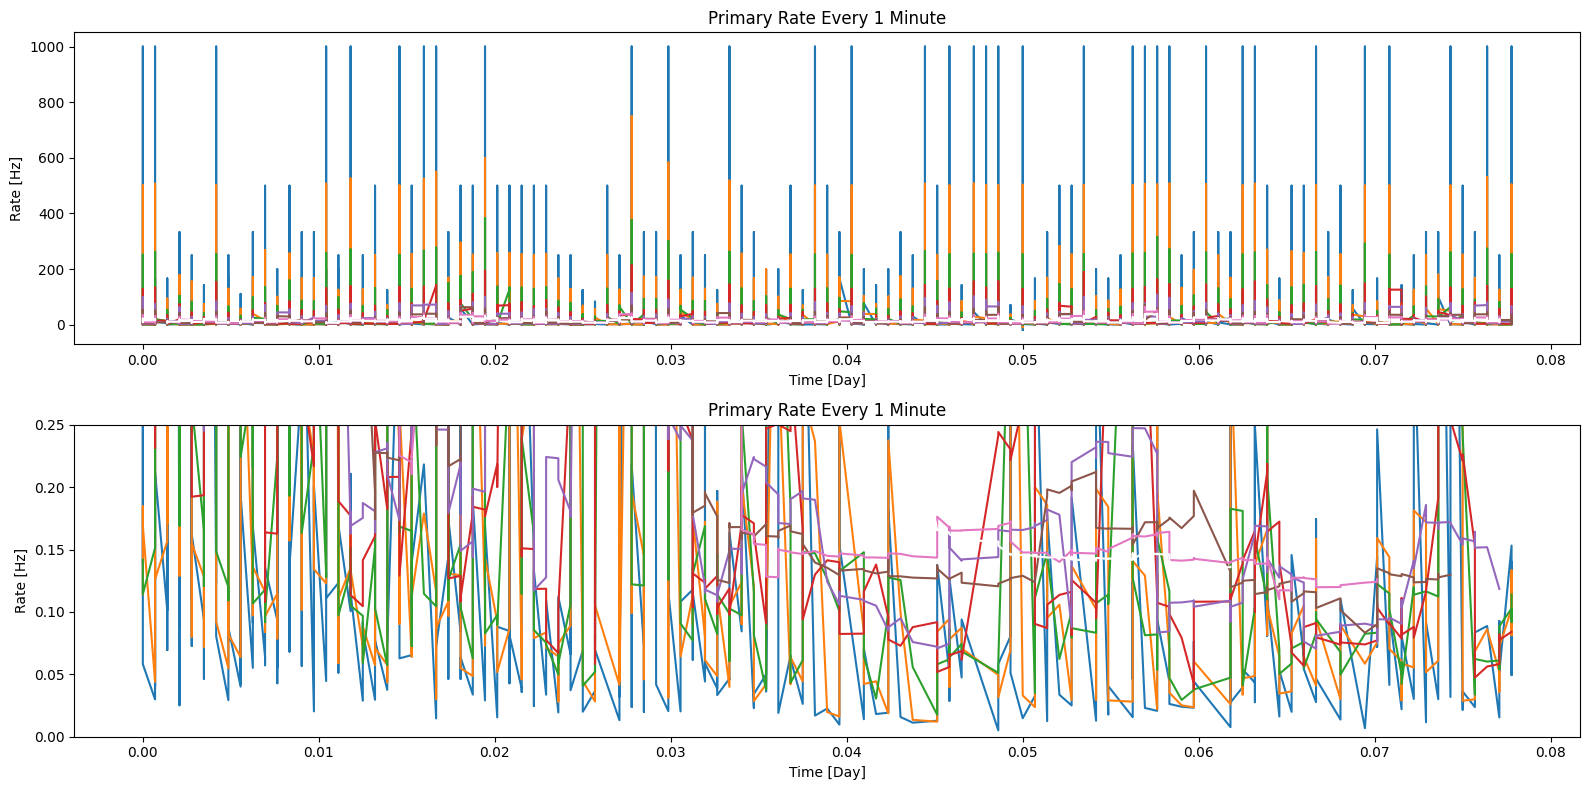

In [7]:
SData = dataA
PData = dataB

sigma = 1
SData['Smooth1'] = dataA['Rate'].rolling(window = 2, center = True).mean()
PData['Smooth1'] = dataB['Rate'].rolling(window = 2, center = True).mean()

SData['Smooth2'] = dataA['Rate'].rolling(window = 4, center = True).mean()
PData['Smooth2'] = dataB['Rate'].rolling(window = 4, center = True).mean()

SData['Smooth3'] = dataA['Rate'].rolling(window = 8, center = True).mean()
PData['Smooth3'] = dataB['Rate'].rolling(window = 8, center = True).mean()

SData['Smooth4'] = dataA['Rate'].rolling(window = 16, center = True).mean()
PData['Smooth4'] = dataB['Rate'].rolling(window = 16, center = True).mean()

SData['Smooth5'] = dataA['Rate'].rolling(window = 32, center = True).mean()
PData['Smooth5'] = dataB['Rate'].rolling(window = 32, center = True).mean()

SData['Smooth6'] = dataA['Rate'].rolling(window = 64, center = True).mean()
PData['Smooth6'] = dataB['Rate'].rolling(window = 64, center = True).mean()

SData['Smooth7'] = dataA['Rate'].rolling(window = 128, center = True).mean()
PData['Smooth7'] = dataB['Rate'].rolling(window = 128, center = True).mean()

fig = plt.figure(figsize=(16,8))

# Add the first subplot
ax1 = fig.add_subplot(211)
ax1.plot(dataA.Days,dataA.Rate)
ax1.plot(dataA.Days,dataA.Smooth1)
ax1.plot(dataA.Days,dataA.Smooth2)
ax1.plot(dataA.Days,dataA.Smooth3)
ax1.plot(dataA.Days,dataA.Smooth4)
ax1.plot(dataA.Days,dataA.Smooth5)
ax1.plot(dataA.Days,dataA.Smooth6)
ax1.plot(dataA.Days,dataA.Smooth7, 'w-')
ax1.set_title('Primary Rate Every 1 Minute')
ax1.set_xlabel('Time [Day]')
ax1.set_ylabel('Rate [Hz]')

ax2 = fig.add_subplot(212)
ax2.set_ylim(0,0.25)
ax2.plot(dataB.Days,dataB.Rate)
ax2.plot(dataB.Days,dataB.Smooth1)
ax2.plot(dataB.Days,dataB.Smooth2)
ax2.plot(dataB.Days,dataB.Smooth3)
ax2.plot(dataB.Days,dataB.Smooth4)
ax2.plot(dataB.Days,dataB.Smooth5)
ax2.plot(dataB.Days,dataB.Smooth6)
ax2.plot(dataB.Days,dataB.Smooth7, 'w-')
ax2.set_title('Primary Rate Every 1 Minute')
ax2.set_xlabel('Time [Day]')
ax2.set_ylabel('Rate [Hz]')

# Display the plots
plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()

## Calculate and Plot Rate Every 5 Min

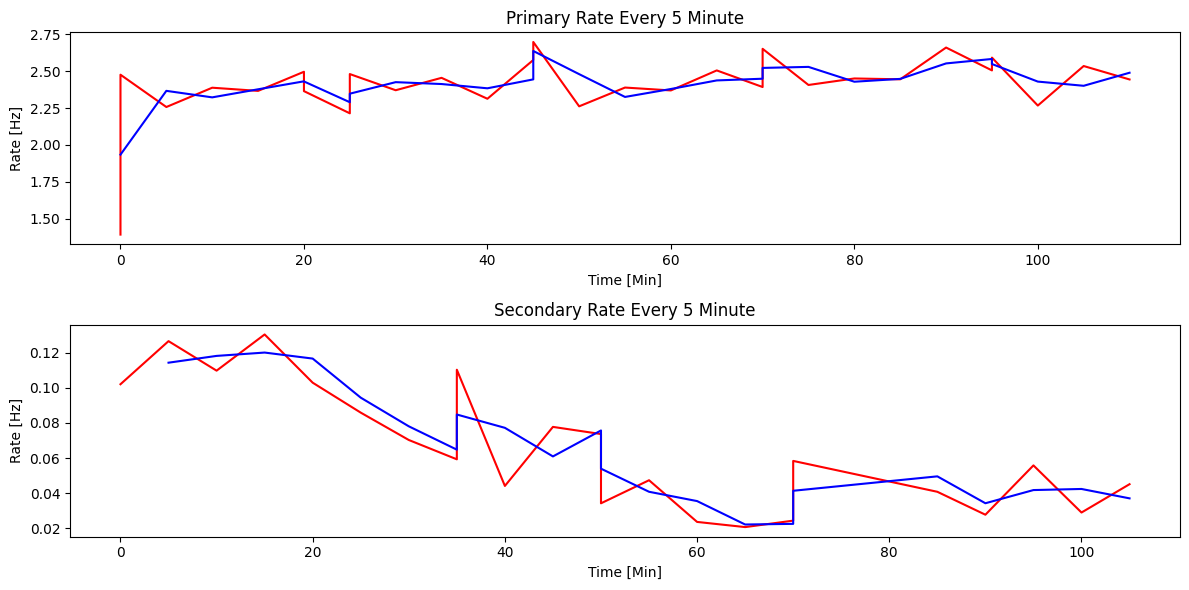

In [5]:
# Set A
Data5MinA = Data1MinA.query('Minute % 5 == 0')
Data5MinA = Data5MinA.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]
Data5MinA['DeltaCount'] = Data5MinA.Event - Data5MinA.Event.shift(1)
Data5MinA['DeltaUpTime'] = Data5MinA.UpTime - Data5MinA.UpTime.shift(1)
Data5MinA['Rate'] = Data5MinA.DeltaCount / (Data5MinA.DeltaUpTime /1000)


#Set B
Data5MinB = Data1MinB.query('Minute % 5 == 0')
Data5MinB = Data5MinB.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]
Data5MinB['DeltaCount'] = Data5MinB.Event - Data5MinB.Event.shift(1)
Data5MinB['DeltaUpTime'] = Data5MinB.UpTime - Data5MinB.UpTime.shift(1)
Data5MinB['Rate'] = Data5MinB.DeltaCount / (Data5MinB.DeltaUpTime /1000)

sigma = 1
Data5MinA['RateSmooth'] = Data5MinA['Rate'].rolling(2).mean()
Data5MinB['RateSmooth'] = Data5MinB['Rate'].rolling(2).mean()

# Plot
#plt.figure(figsize=(24,6))
#plt.plot(Data5MinA.Minute,Data5MinA.Rate)
#plt.plot(Data5MinB.Minute,Data5MinB.Rate)
#plt.title("Rate Every 5 Minutes")
#plt.xlabel("Minutes")
#plt.ylabel("Rate [Hz]");

# Create a figure
fig = plt.figure(figsize=(12,6))

# Add the first subplot
ax1 = fig.add_subplot(211)  # 2 rows, 1 column, 1st subplot
ax1.plot(Data5MinA.Minute,Data5MinA.Rate, 'r-')  # 'r-' is a red line
ax1.plot(Data5MinA.Minute,Data5MinA.RateSmooth, 'b-')  # 'b-' is a blue line
ax1.set_title('Primary Rate Every 5 Minute')
ax1.set_xlabel('Time [Min]')
ax1.set_ylabel('Rate [Hz]')

# Add the second subplot
ax2 = fig.add_subplot(212)  # 2 rows, 1 column, 2nd subplot
ax2.plot(Data5MinB.Minute,Data5MinB.Rate, 'r-')  # 'r-' is a red line
ax2.plot(Data5MinB.Minute,Data5MinB.RateSmooth, 'b-')  # 'b-' is a blue line
ax2.set_title('Secondary Rate Every 5 Minute')
ax2.set_xlabel('Time [Min]')
ax2.set_ylabel('Rate [Hz]')

# Display the plots
plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()

## Calculate and Plot Rate Every 20 Min

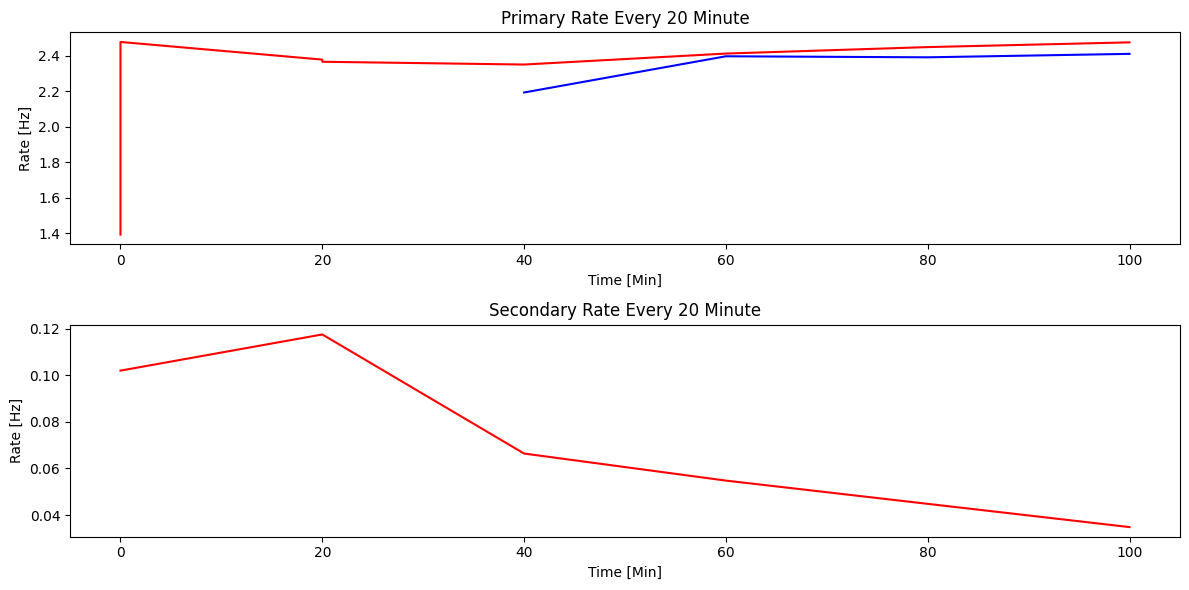

In [6]:
# Set A
Data20MinA = Data1MinA.query('Minute % 20 == 0')
Data20MinA = Data20MinA.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]
Data20MinA['DeltaCount'] = Data20MinA.Event - Data20MinA.Event.shift(1)
Data20MinA['DeltaUpTime'] = Data20MinA.UpTime - Data20MinA.UpTime.shift(1)
Data20MinA['Rate'] = Data20MinA.DeltaCount / (Data20MinA.DeltaUpTime /1000)

# Set B
Data20MinB = Data1MinB.query('Minute % 20 == 0')
Data20MinB = Data20MinB.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]
Data20MinB['DeltaCount'] = Data20MinB.Event - Data20MinB.Event.shift(1)
Data20MinB['DeltaUpTime'] = Data20MinB.UpTime - Data20MinB.UpTime.shift(1)
Data20MinB['Rate'] = Data20MinB.DeltaCount / (Data20MinB.DeltaUpTime /1000)

# plt.figure(figsize=(12,3))
# plt.plot(Data20MinA.Minute,Data20MinA.Rate)
# plt.plot(Data20MinB.Minute,Data20MinB.Rate)
# plt.title("Rate Every 20 Minutes")
# plt.xlabel("Minutes")
# plt.ylabel("Rate [Hz]");

sigma = 1
Data20MinA['RateSmooth'] = Data20MinA['Rate'].rolling(5).mean()
Data20MinB['RateSmooth'] = Data20MinB['Rate'].rolling(5).mean()

# Create a figure
fig = plt.figure(figsize=(12,6))

# Add the first subplot
ax1 = fig.add_subplot(211)  # 2 rows, 1 column, 1st subplot
ax1.plot(Data20MinA.Minute,Data20MinA.Rate, 'r-')  # 'r-' is a red line
ax1.plot(Data20MinA.Minute,Data20MinA.RateSmooth, 'b-')  # 'b-' is a blue line
ax1.set_title('Primary Rate Every 20 Minute')
ax1.set_xlabel('Time [Min]')
ax1.set_ylabel('Rate [Hz]')

# Add the second subplot
ax2 = fig.add_subplot(212)  # 2 rows, 1 column, 2nd subplot
ax2.plot(Data20MinB.Minute,Data20MinB.Rate, 'r-')  # 'r-' is a red line
ax2.plot(Data20MinB.Minute,Data20MinB.RateSmooth, 'b-')  # 'b-' is a blue line
ax2.set_title('Secondary Rate Every 20 Minute')
ax2.set_xlabel('Time [Min]')
ax2.set_ylabel('Rate [Hz]')

# Display the plots
plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()